## Collision Data Analysis,  Seattle City

### Introduction
Seattle city is well known for its challenging weather and driving conditions. It represents majority of the mega cities in the USA in terms of many factors that contribute to the severity factor of a vehicle collision. In this project, the collision data from the city of Seattle recorded between years 2004-2020 was analyzed and I have built several machine learning models to predict the severity of the collision based on various factors. I have then compared the models based on various evaluation parameters. 
This project is particularly useful for the Seattle police and traffic department, interested in knowing how severe the collision is going to be based on several factors such as road conditions, number of vehicles involved, weather conditions and others. They would also want to understand the impact of different factors on the outcome of such collisions. The whole idea behind this project is to build a robust machine learning model that can predict the severity of a collision and provide insights into how to prevent such collisions so that the drivers can be alerted in time.
I have used various techniques of data science in this project, such as data cleaning, feature engineering, data exploratory analysis, building predictive models, and model evaluation. I have also extracted insights from the results to help stakeholders prevent or limit the severity of such collisions and to help them improve a response time in case of emergencies. 


### Data

The data for this project was collected from the shared data included in IBM's Applied Data Science Capstone Project [link](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv). This dataset includes many useful features to build a robust predictive machine learning model. The metadata can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).
Data at a glance :
* The data has been recorded by SPD and traffic records. 
* The data contains all types of collisions that occurred between 2004-2020 in the city of Seattle. 
* It has a total of around 195000 records and 38 columns
* The data table consists of various columns such as location, date and time, severity, collision type, weather etc. 

### Data Source

In [1]:
 # Important imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df_data.shape

(194673, 38)

### Date and time analysis

In [4]:
df_datetime = df_data[['SEVERITYCODE', 'INCDTTM']]
df_datetime['INCDTTM'] = pd.to_datetime(df_datetime['INCDTTM'])
df_datetime['YEAR'] = df_datetime['INCDTTM'].dt.year.astype('int64')
df_datetime['MONTH'] = df_datetime['INCDTTM'].dt.month.astype('int64')
df_datetime['HOUR'] = df_datetime['INCDTTM'].dt.hour.astype('int64')
df_datetime['MIN'] = df_datetime['INCDTTM'].dt.minute.astype('int64')
df_datetime.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,SEVERITYCODE,INCDTTM,YEAR,MONTH,HOUR,MIN
0,2,2013-03-27 14:54:00,2013,3,14,54
1,1,2006-12-20 18:55:00,2006,12,18,55
2,1,2004-11-18 10:20:00,2004,11,10,20
3,1,2013-03-29 09:26:00,2013,3,9,26
4,2,2004-01-28 08:04:00,2004,1,8,4


In [5]:
# get catplot function
def get_catplot(column, hue, df):
  ax = sns.catplot(column, data=df, aspect=2.0, kind='count', hue=hue, legend = False)
  ax.set_xticklabels(rotation=45, fontsize=16)
  ax.set_yticklabels(fontsize=16)
  ax.set_xlabels(column, fontsize=16, labelpad = 20)
  ax.set_ylabels('Number of Collisions', fontsize=16, labelpad = 20)
  legend = plt.legend(title='SEVERITY', loc=(1,1), fontsize=16)
  legend.get_title().set_fontsize('16')
  plt.show()
  return ax

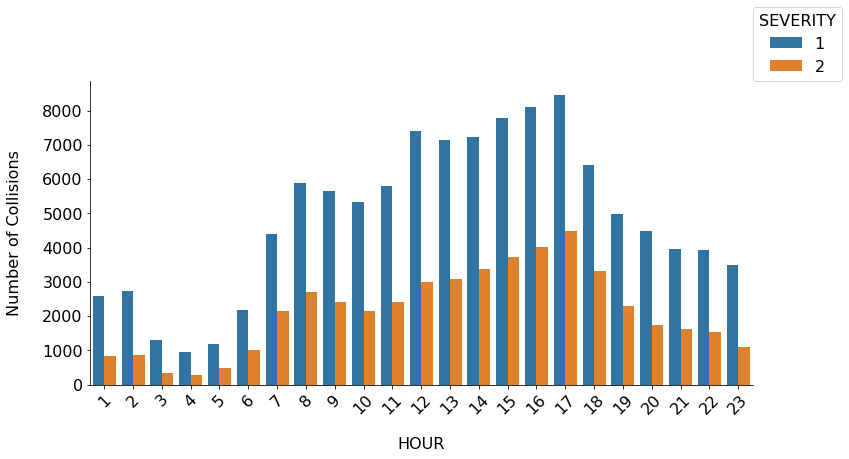

In [6]:
# Hour plot
a = df_datetime[df_datetime['HOUR']>0]
ax1=get_catplot('HOUR', 'SEVERITYCODE', a)

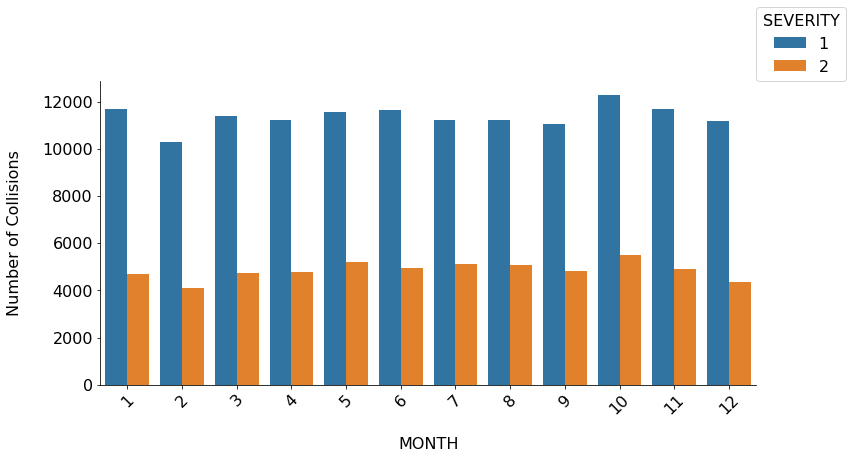

In [7]:
# Month Plot
ax2=get_catplot('MONTH', 'SEVERITYCODE', df_datetime)

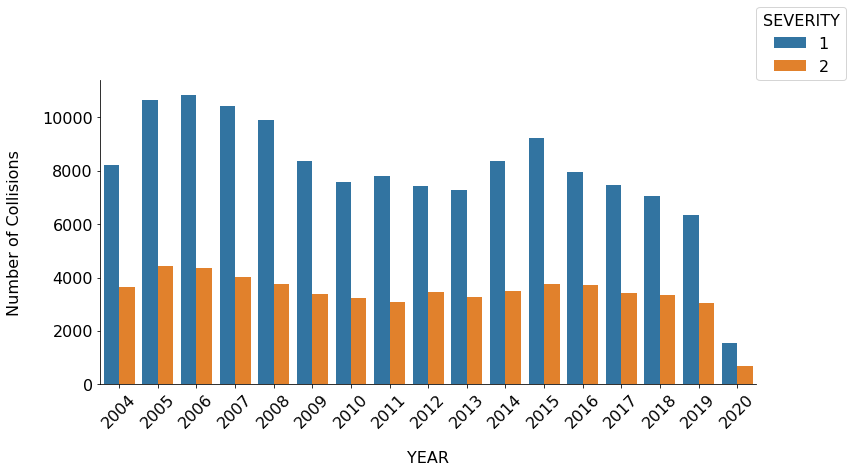

In [8]:
# Year plot
ax3=get_catplot('YEAR', 'SEVERITYCODE', df_datetime)

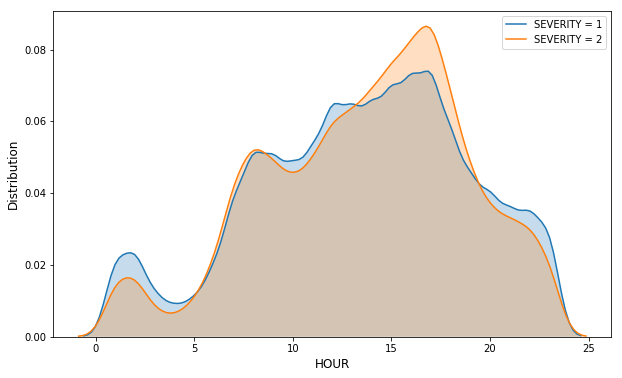

In [9]:
# Hour distribution
plt.figure(figsize=(10,6))
sns.kdeplot(a['HOUR'][a['SEVERITYCODE']==1], label='SEVERITY = 1', shade=True)
sns.kdeplot(a['HOUR'][a['SEVERITYCODE']==2], label='SEVERITY = 2', shade=True)
plt.xlabel('HOUR', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


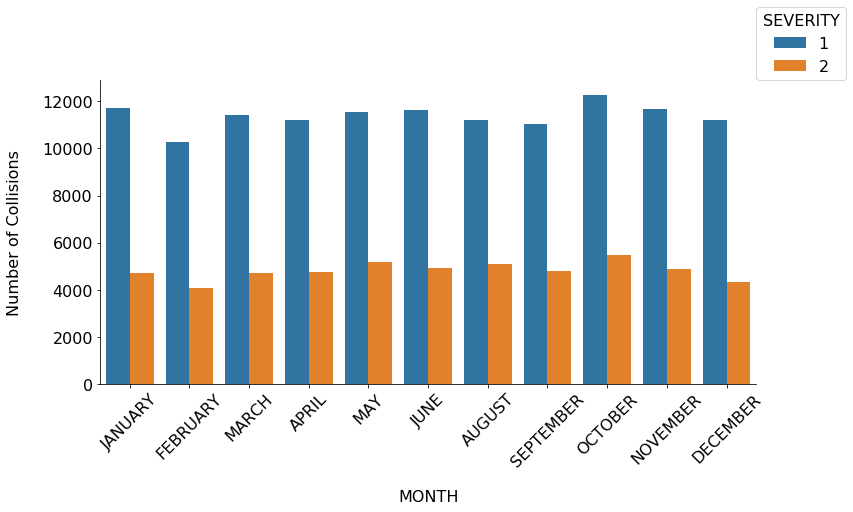

In [10]:
# Get month plot with correct labels
df_datetime['MONTH'] = df_datetime['MONTH'].map({1:'JANUARY', 2:'FEBRUARY', 3:'MARCH', 4:'APRIL', 5:'MAY', 6:'JUNE', 7:'JULY', 8:'AUGUST', 9:'SEPTEMBER', 10:'OCTOBER', 11:'NOVEMBER', 12: 'DECEMBER'})
months = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
ax0 = sns.catplot('MONTH', data=df_datetime, aspect=2.0, kind='count', hue='SEVERITYCODE', legend = False, order=months)
ax0.set_xticklabels(rotation=45, fontsize=16)
ax0.set_yticklabels(fontsize=16)
ax0.set_xlabels('MONTH', fontsize=16, labelpad = 20)
ax0.set_ylabels('Number of Collisions', fontsize=16, labelpad = 20)
legend = plt.legend(title='SEVERITY', loc=(1,1), fontsize=16)
legend.get_title().set_fontsize('16')
plt.show()

### Data cleaning

In [11]:
# Drop unnecessary columns  
cols_to_drop = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC','INCDATE', 'INCDTTM', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY' ]
df_data.drop(cols_to_drop, axis=1, inplace=True)
df_data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [12]:
# Fill/drop NaN values
df_data.fillna({'INATTENTIONIND':'N', 'PEDROWNOTGRNT':'N', 'SPEEDING':'N'},inplace=True)
df_data['UNDERINFL'].replace({'0':'N', np.nan:'N', '1':'Y'}, inplace=True)
df_data.fillna({'ADDRTYPE':'Other', 'COLLISIONTYPE':'Other', 'JUNCTIONTYPE':'Unknown', 'WEATHER':'Other', 'ROADCOND':'Unknown', 'LIGHTCOND':'Unknown'},inplace=True)
df_data.dropna(subset=['ST_COLCODE'], inplace=True)
df_data.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
HITPARKEDCAR      0
dtype: int64

In [13]:
df_data['SDOT_COLCODE']=df_data['SDOT_COLCODE'].astype(str)

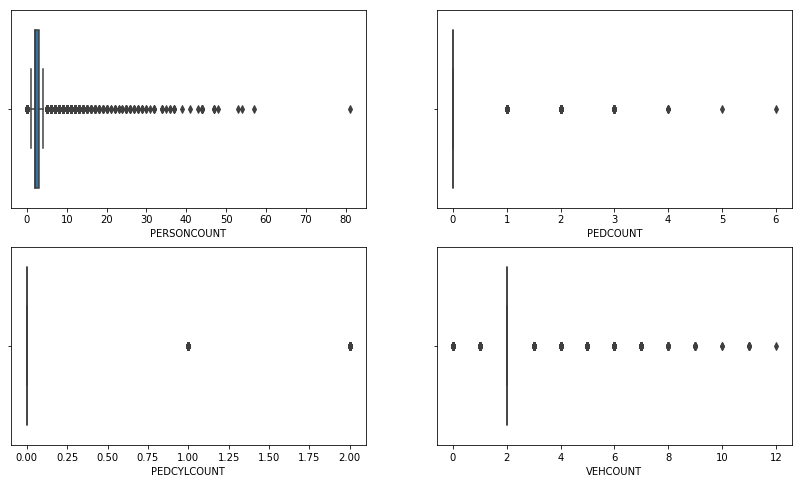

In [14]:
# Find Outliers in numeric columns
fig=plt.figure(figsize=(14,8))
plt.figure
g1=fig.add_subplot(2,2,1)
g2=fig.add_subplot(2,2,2)
g3=fig.add_subplot(2,2,3)
g4=fig.add_subplot(2,2,4)

sns.boxplot(x='PERSONCOUNT',data = df_data, ax=g1)
sns.boxplot(x='PEDCOUNT',data = df_data, ax=g2)
sns.boxplot(x='PEDCYLCOUNT',data = df_data, ax=g3)
sns.boxplot(x='VEHCOUNT',data = df_data, ax=g4)
plt.show()

In [15]:
# Get horizontle catplot function
def get_catplot_h(column, hue, df):
  ax = sns.catplot(y=column, data=df, aspect=2.0, kind='count', hue=hue, legend = False, orient='h')
  ax.set_xticklabels(fontsize=16)
  ax.set_yticklabels(fontsize=16)
  ax.set_xlabels('Number of Collisions', fontsize=16, labelpad = 20)
  ax.set_ylabels(column, fontsize=16, labelpad = 20)
  legend = plt.legend(title='SEVERITY', loc=(1,1), fontsize=16)
  legend.get_title().set_fontsize('16')
  plt.show()
  return ax

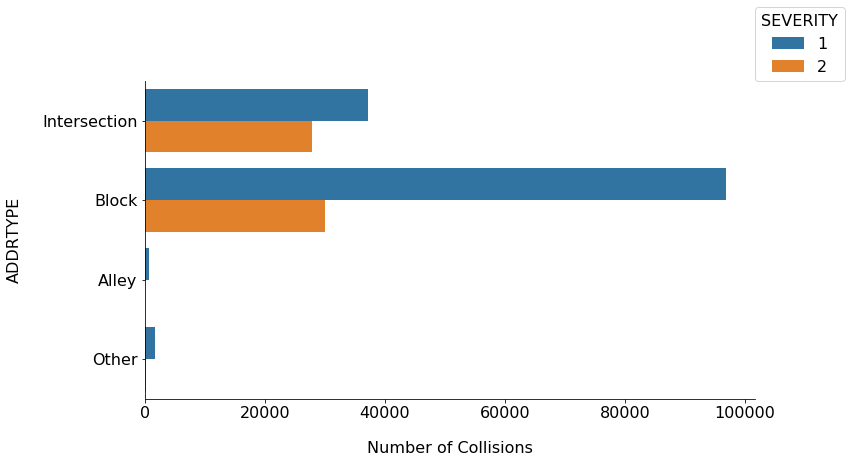

In [16]:
# ADDRTYPE plot
ax4=get_catplot_h('ADDRTYPE', 'SEVERITYCODE', df_data)

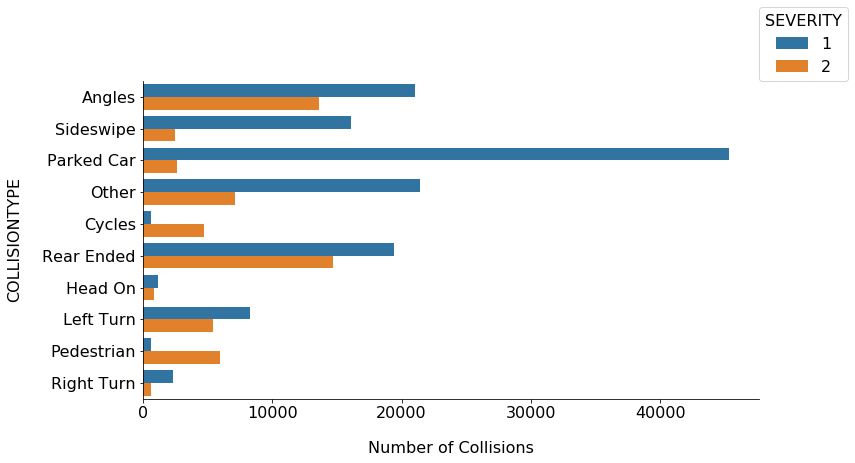

In [17]:
# COLLISIONTYPE plot
ax5=get_catplot_h('COLLISIONTYPE', 'SEVERITYCODE', df_data)

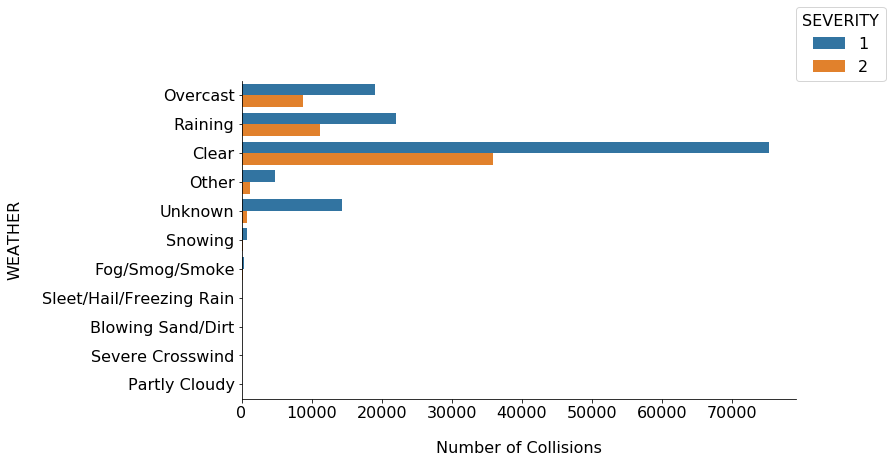

In [20]:
# WEATHER plot
ax6=get_catplot_h('WEATHER', 'SEVERITYCODE', df_data)

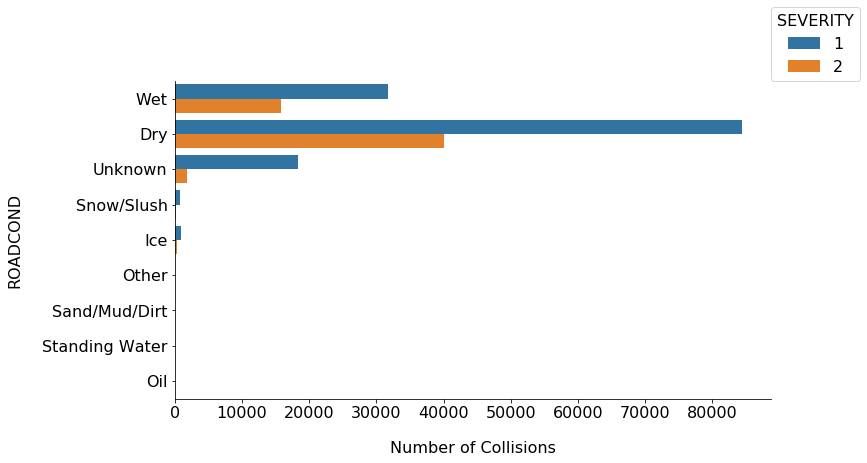

In [21]:
# ROADCOND plot
ax7=get_catplot_h('ROADCOND', 'SEVERITYCODE', df_data)

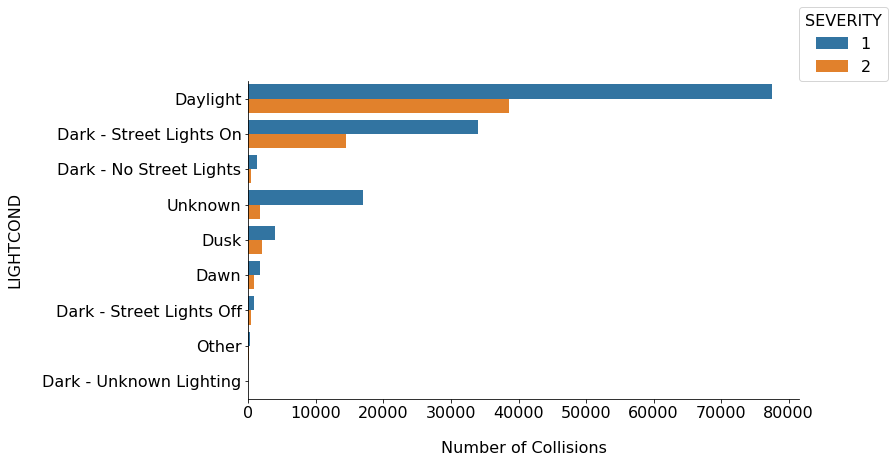

In [22]:
# LIGHTCOND plot
ax8=get_catplot_h('LIGHTCOND', 'SEVERITYCODE', df_data)

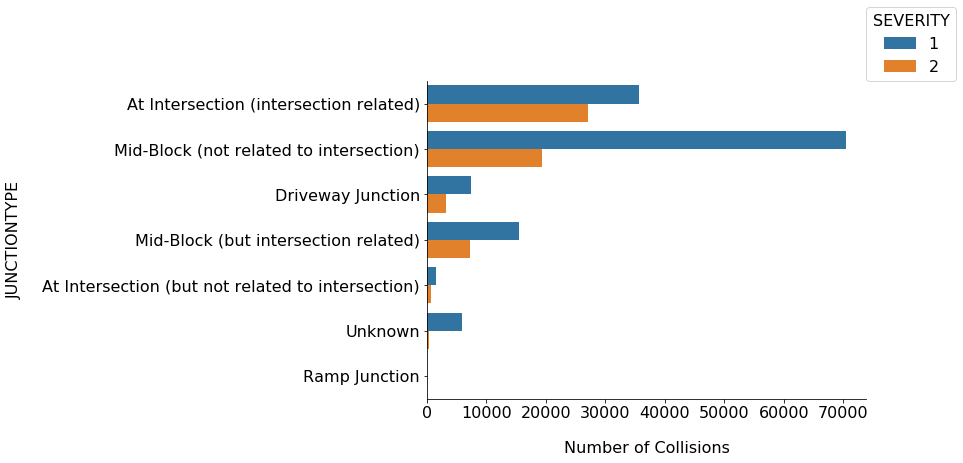

In [23]:
# JUNCTIONTYPE plot
ax9=get_catplot_h('JUNCTIONTYPE', 'SEVERITYCODE', df_data)

### Label Encoding

In [24]:
yes_no_cols = ['INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']
for value in yes_no_cols:
  df_data[value].replace({'Y':1, 'N': 0}, inplace=True)

In [25]:
dummy_cols = ['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','SDOT_COLCODE','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE']
df = pd.get_dummies(data=df_data, columns=dummy_cols)
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,...,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88
0,2,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(194655, 214)

### Model Building

In [27]:
# important imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
X1 = df.drop('SEVERITYCODE', axis=1)
y1 = df['SEVERITYCODE']
X1.shape, y1.shape

((194655, 213), (194655,))

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state = 42)
X1_train.shape, X1_test.shape

((155724, 213), (38931, 213))

In [30]:
# function to generate confusion matrix
def get_confusion(cm, title):
  plt.figure(figsize=(10,6))
  ax1 = sns.heatmap(cm, annot=True, cmap="Blues", annot_kws = {"size": 14}, fmt='g')
  ax1.set_xlabel('Predicted', fontsize = 14, labelpad=20)
  ax1.set_ylabel('True', fontsize = 14, rotation='horizontal', labelpad=40)
  ax1.set_xticklabels(labels=['Severity 1', 'Severity 2'], fontsize = 14)
  ax1.set_yticklabels(labels=['Severity 1', 'Severity 2'], fontsize = 14)
  ax1.set_title(title, fontsize = 18, pad = 20)
  ax1.collections[0].colorbar.ax.tick_params(labelsize=14)
  plt.show()

In [31]:
# Logistic regression
lr1 = LogisticRegression(C=0.1, max_iter=1000)
lr1.fit(X1_train, y1_train)
y1_pred_lr = lr1.predict(X1_test)
print(classification_report(y1_test, y1_pred_lr))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.77      0.95      0.85     27474
           2       0.72      0.32      0.44     11457

   micro avg       0.76      0.76      0.76     38931
   macro avg       0.75      0.63      0.65     38931
weighted avg       0.76      0.76      0.73     38931



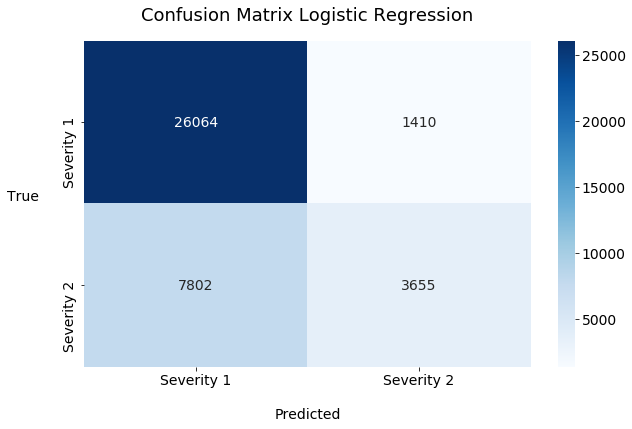

In [32]:
cm1_lr = confusion_matrix(y1_test, y1_pred_lr)
get_confusion(cm1_lr, title='Confusion Matrix Logistic Regression')

In [33]:
# Random forest
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X1_train, y1_train)
y1_pred_rf = rf1.predict(X1_test)
print(classification_report(y1_test, y1_pred_rf))

              precision    recall  f1-score   support

           1       0.78      0.91      0.84     27474
           2       0.63      0.38      0.47     11457

   micro avg       0.75      0.75      0.75     38931
   macro avg       0.70      0.64      0.66     38931
weighted avg       0.73      0.75      0.73     38931



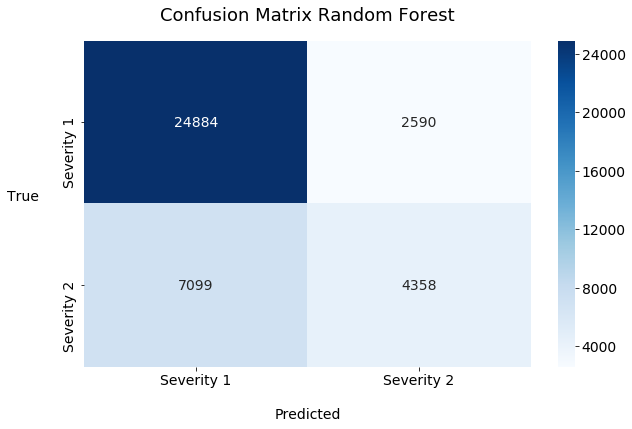

In [34]:
cm1_rf = confusion_matrix(y1_test, y1_pred_rf)
get_confusion(cm1_rf, title='Confusion Matrix Random Forest')

In [35]:
# Naive Bayes
nb1 = GaussianNB()
nb1.fit(X1_train, y1_train)
y1_pred_nb = nb1.predict(X1_test)
print(classification_report(y1_test, y1_pred_nb))

              precision    recall  f1-score   support

           1       0.80      0.83      0.81     27474
           2       0.55      0.49      0.52     11457

   micro avg       0.73      0.73      0.73     38931
   macro avg       0.67      0.66      0.67     38931
weighted avg       0.72      0.73      0.73     38931



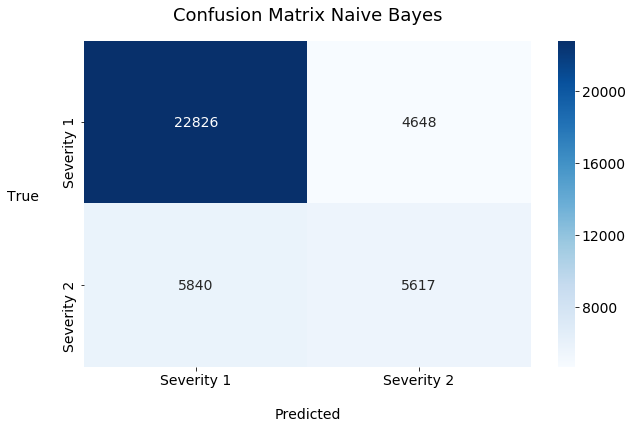

In [36]:
cm1_nb = confusion_matrix(y1_test, y1_pred_nb)
get_confusion(cm1_nb, title='Confusion Matrix Naive Bayes')

In [37]:
# Gradient Boost
gb1 = GradientBoostingClassifier(random_state=0)
gb1.fit(X1_train, y1_train)
y1_pred_gb = gb1.predict(X1_test)
print(classification_report(y1_test, y1_pred_gb))

              precision    recall  f1-score   support

           1       0.77      0.95      0.85     27474
           2       0.73      0.32      0.44     11457

   micro avg       0.76      0.76      0.76     38931
   macro avg       0.75      0.64      0.65     38931
weighted avg       0.76      0.76      0.73     38931



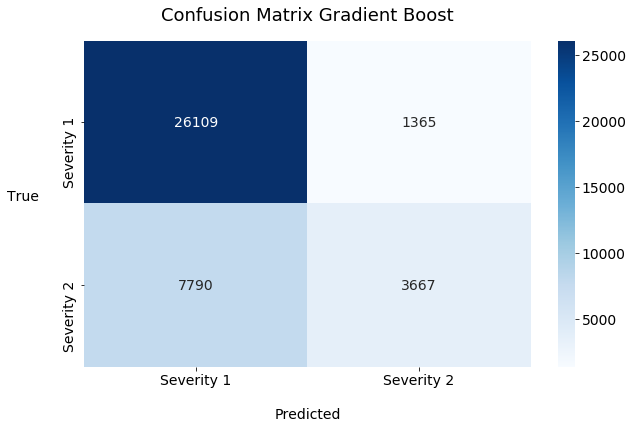

In [38]:
cm1_gb = confusion_matrix(y1_test, y1_pred_gb)
get_confusion(cm1_gb, title='Confusion Matrix Gradient Boost')

### Under Sampling

In [39]:
severity_two_len = len(df[df['SEVERITYCODE']==2])
print(severity_two_len)
severity_one_indices = df[df['SEVERITYCODE']==1].index
severity_two_indices = df[df['SEVERITYCODE']==2].index
ran_severity_one_indices = np.random.choice(severity_one_indices, severity_two_len, replace=False)
print(len(ran_severity_one_indices))
final_indices = np.concatenate([ran_severity_one_indices, severity_two_indices])
under_df=df.loc[final_indices]
under_df.shape

58175
58175


(116350, 214)

### Model building

In [40]:
X = under_df.drop('SEVERITYCODE', axis=1)
y = under_df['SEVERITYCODE']
X.shape, y.shape

((116350, 213), (116350,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape

((93080, 213), (23270, 213))

In [42]:
# Logistic regression
lr = LogisticRegression(C=0.1, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.76      0.65      0.70     11794
           2       0.69      0.79      0.73     11476

   micro avg       0.72      0.72      0.72     23270
   macro avg       0.72      0.72      0.72     23270
weighted avg       0.72      0.72      0.72     23270



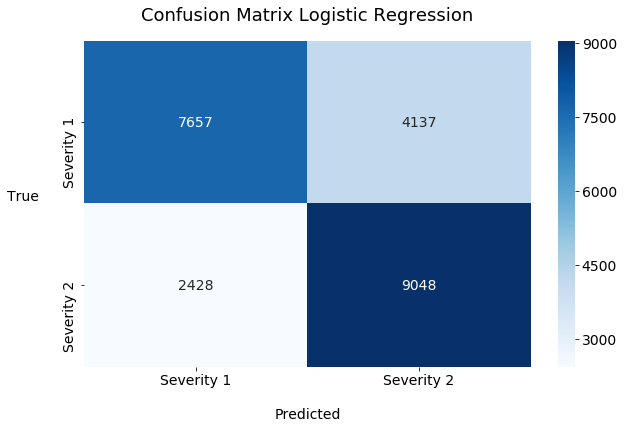

In [43]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
get_confusion(cm_lr, title='Confusion Matrix Logistic Regression')

In [44]:
# Random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.74      0.65      0.69     11794
           2       0.68      0.76      0.72     11476

   micro avg       0.71      0.71      0.71     23270
   macro avg       0.71      0.71      0.70     23270
weighted avg       0.71      0.71      0.70     23270



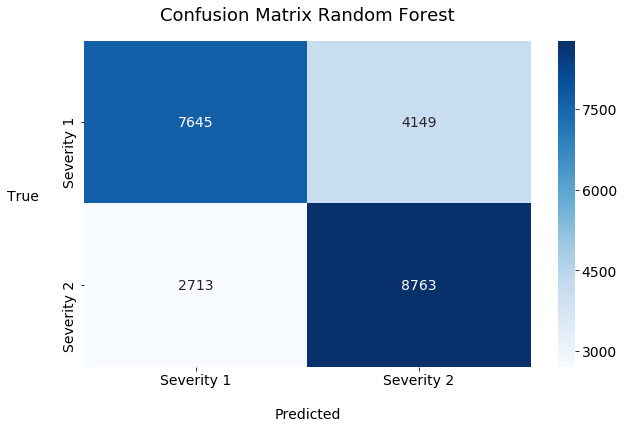

In [45]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
get_confusion(cm_rf, title='Confusion Matrix Random Forest')

In [46]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.56      0.98      0.71     11794
           2       0.92      0.21      0.34     11476

   micro avg       0.60      0.60      0.60     23270
   macro avg       0.74      0.60      0.53     23270
weighted avg       0.74      0.60      0.53     23270



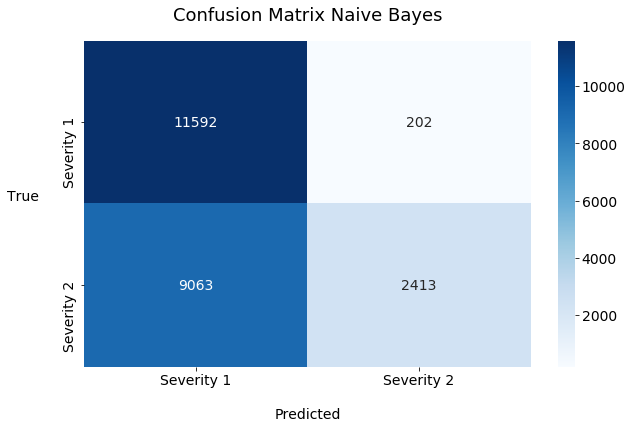

In [47]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
get_confusion(cm_nb, title='Confusion Matrix Naive Bayes')

In [48]:
# Gradient Boost
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.77      0.63      0.69     11794
           2       0.68      0.81      0.74     11476

   micro avg       0.72      0.72      0.72     23270
   macro avg       0.73      0.72      0.72     23270
weighted avg       0.73      0.72      0.72     23270



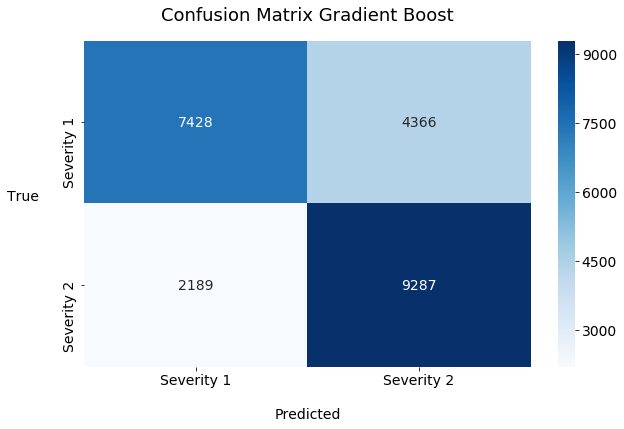

In [49]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
get_confusion(cm_gb, title='Confusion Matrix Gradient Boost')

### Conclusion

In this project, I built four predictive models to classify collisions severity based on several features, such as weather condition, road condition, number of persons and vehicles etc. All four models produced biased results towards severity 1 when I used all the training dataset. The reason behind this bias was unbalanced data. To resolve this issue, the under-sampling technique was used and the three models out of four produced unbiased results. Based on the overall performance, Gradient Boost predictive model proved to be the best candidate producing 72% accuracy.